In [1]:
print("Hello world")

Hello world


# Question 1: Loading dataset

2025-03-16 09:34:50.807201: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 09:34:50.812943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 09:34:50.868932: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 09:34:50.938893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742097891.012851    4419 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742097891.03

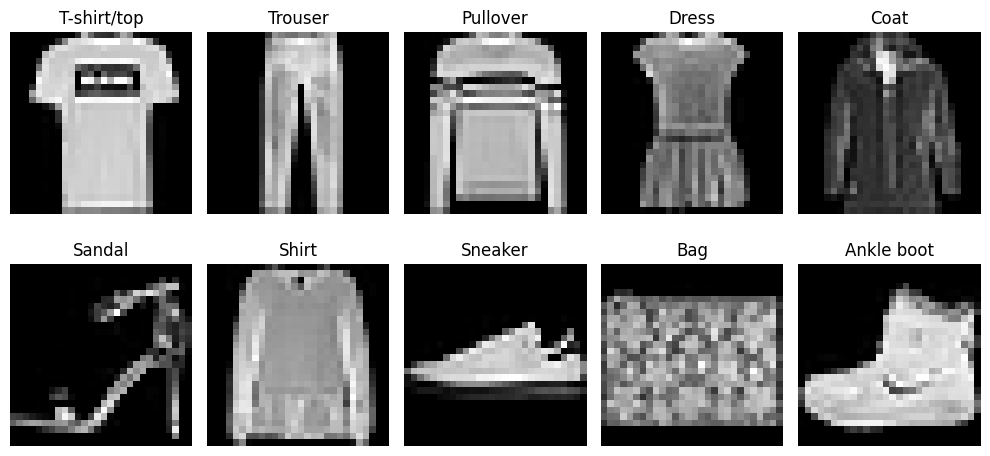

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Find one sample per class
sample_images = []
sample_labels = []

for class_id in range(10):
    index = np.where(y_train == class_id)[0][0]  # Get the first occurrence of the class
    sample_images.append(X_train[index])
    sample_labels.append(class_names[class_id])

# Plot images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(sample_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
# Normalising and reshaping X and y to ensure each data point is a column vector to be consistent with matrix calculation

X_train = X_train/255.0
X_test = X_test/255.0
X_train = np.array([x.reshape(-1, 1) for x in X_train])
X_test = np.array([x.reshape(-1, 1) for x in X_test])

num_classes = int(np.max(y_train)) + 1  # Convert to int

y_train = np.eye(num_classes)[y_train.astype(int)]  # Ensure indices are integers
y_train = np.array([each_y.reshape(-1, 1) for each_y in y_train])
y_test = np.eye(num_classes)[y_test.astype(int)]  # Ensure indices are integers
y_test = np.array([each_y.reshape(-1, 1) for each_y in y_test])

# Question 2: Feed Forward Neural Network

Can be found in model.py

# Question 3: Backpropogation with all the mentioned optimisation techniques

Can be found in model.py

The working of the model.py has been tested in the code block below.

In [5]:
import numpy as np
import importlib
import model  # Ensure model.py is imported
importlib.reload(model)  # Reload the module

from model import Model  # Import the class

# Create an object of the Model class with some example values
model = Model(
    num_hidden_layers=2,
    hidden_layer_size=[256, 256],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model.train(X_train, y_train, 10, 64)
y_hat = model.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))

print("Test accuracy:", test_acc)


Epoch number: 1

Epoch: 1, batch: 0/937 completed....Accuracy: 0.328125
Epoch: 1, batch: 100/937 completed....Accuracy: 0.828125
Epoch: 1, batch: 200/937 completed....Accuracy: 0.859375
Epoch: 1, batch: 300/937 completed....Accuracy: 0.765625
Epoch: 1, batch: 400/937 completed....Accuracy: 0.8125
Epoch: 1, batch: 500/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 600/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 700/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 800/937 completed....Accuracy: 0.796875
Epoch: 1, batch: 900/937 completed....Accuracy: 0.84375
Epoch number: 2

Epoch: 2, batch: 0/937 completed....Accuracy: 0.84375
Epoch: 2, batch: 100/937 completed....Accuracy: 0.828125
Epoch: 2, batch: 200/937 completed....Accuracy: 0.890625
Epoch: 2, batch: 300/937 completed....Accuracy: 0.765625
Epoch: 2, batch: 400/937 completed....Accuracy: 0.859375
Epoch: 2, batch: 500/937 completed....Accuracy: 0.859375
Epoch: 2, batch: 600/937 completed....Accuracy: 0.875
Epoch: 2, b

# Question 4: Sweep

**1st set of experiments:**

{

    "name": "1st set of experiments",

    "epochs": [5],

    "num_hidden_layers": [3],

    "hidden_layer_size": [32],

    "weight_decay": [0.5, 0.0005],

    "learning_rate": [0.001, 0.0001],

    "optimizer": ["Adam", "RMSprop", "nesterov"],

    "batch_size": [64],

    "weight_initialization": ["xavier"],

    "activation_functions": ["sigmoid", "tanh"]
}

In [ ]:
!python sweep.py

**2nd set of experiments**

{

    "name": "2nd set of experiments",

    "epochs": [10],

    "num_hidden_layers": [3],

    "hidden_layer_size": [32, 64, 128],

    "weight_decay": [0.0005],

    "learning_rate": [0.001],

    "optimizer": ["Adam", "RMSprop"],

    "batch_size": [32, 64],

    "weight_initialization": ["xavier"],

    "activation_functions": ["tanh"]

}


In [ ]:
!python sweep.py

# Question 5: Wandb report

The required plots have been added to the report

# Question 6: Inferences 

Best run: hl_3_hs_128_bs_64_ac_tanh_wd_0.0005_lr_0.001_opt_RMSprop_wi_xavier_ep_

# Question 7: Evaluating the best model

Confusion matrix and test accuracy are shown below. Also uploaded the confusion matrix on wandb

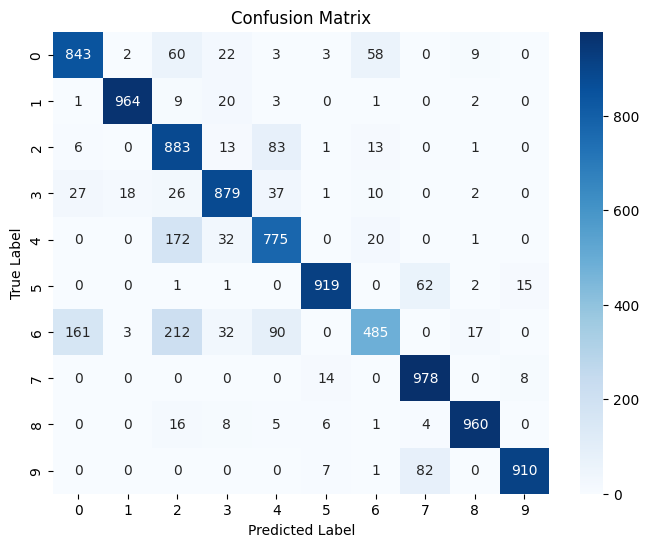

Test accuracy 0.8596


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predictions and ground truth from (10k, 10, 1) to (10k,)
y_pred = np.argmax(y_hat, axis=1).flatten()
y_true = np.argmax(y_test, axis=1).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))

print("Test accuracy", test_acc)


Some Inferences:

1.

2.

3.


In [17]:
import wandb
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
run = wandb.init(project="DL") 
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                        y_true=list(np.argmax(y_test, axis = 1).flatten()), preds=list(np.argmax(y_hat, axis=1).flatten()),
                        class_names=fashion_mnist_labels)})
run.finish()

# Question 8: MSE vs Cross-entropy

Epoch number: 1

Epoch: 1, batch: 0/93 completed....Accuracy: 0.3109375
Test accuracy for cross-entropy: 0.8249
Epoch number: 1

Epoch: 1, batch: 0/93 completed....Accuracy: 0.3078125
Test accuracy: 0.8171


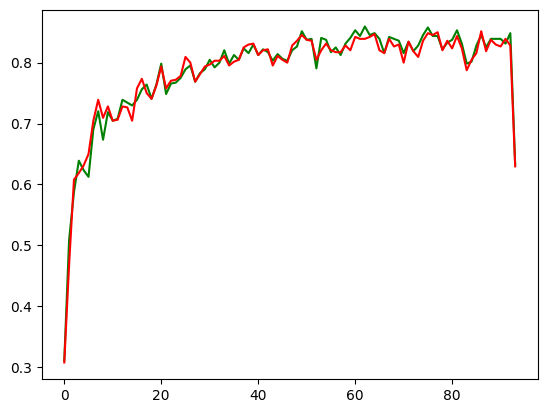

In [ ]:
import numpy as np
import importlib
import model  # Ensure model.py is imported
importlib.reload(model)  # Reload the module
import matplotlib.pyplot as plt
from model import Model  # Import the class


model_cross = Model(
    num_hidden_layers=2,
    hidden_layer_size=[256, 256],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model_cross.train(X_train, y_train, 1, 640)
y_hat = model_cross.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))
training_losses_cross = model_cross.training_loss
print("Test accuracy for cross-entropy:", test_acc)



model_MSE = Model(
    num_hidden_layers=2,
    hidden_layer_size=[256, 256],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'MSE'
)


model_MSE.train(X_train, y_train, 1, 640)
y_hat = model_MSE.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))
training_losses_MSE = model_MSE.training_loss
print("Test accuracy:", test_acc)

plt.plot(training_losses_cross, 'g', label='Cross-Entropy Loss')
plt.plot(training_losses_MSE, 'r', label='MSE Loss')

plt.xlabel('Steps')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Comparison')  # Title of the plot
plt.legend(title='Loss Type')  # Add legend with title

plt.show()


# Question 9: git push

The project can be found in the git repo: *link*

# Question 10: Experiments on MNIST

Rationale behind choice of hyperparameters. 

# Self Declaration

I, Hiran N (MM21B030), swear on my honour that I have written the code and the report by myself and have not copied it from the internet or other students.